# **Best Next Move Location**

## Content:

1. Introduction
2. Data Description
3. Data Preparation
    1. Capital Cities Data Preparation
    2. The World Bank Data Preparation
    3. Comparing 5 Selected Countries
    4. Getting Capital Cities' Coordinates
    5. Creating a Country Profile Card
    6. Collecting Foursquare Capital Cities' Data
4. Refrences

## 1. Introduction:

Often when business or even private individuals look for new ways to provide growth, they seek it overseas. Although the idea of entering a new country can sound attractive, it can also be intimidating at the same time. There are many things to consider when taking a business to a new country, and some of the most intuitive ones are:<br />
- “What are the threats of making this move”?
- “What are the benefits of making this move”?
- “Do we have the resources to expand to that location”?
And probably the most important questions are:
- “Is there even demand for what we have to offer”?
- “How does the competition look like”?

We can try to lower the risks of this kind of move by locating the best potential locations to expand to, or at least, categorize the locations we are looking into so we can understand our situation better. This means that if we can set our potential locations for expansion into clusters of similar locations, we can then either choose the best location to expand to, or even better, develop a unique strategy for each cluster.

Each country’s culture has evolved on the course of time, some have had a longer time to evolve, and some have evolved out of some other county’s culture. Further, countries differ in their economy performance, GDP for example, which can also be a potential factor to investigate when taking a business overseas. Knowing how a country differs from your own beforehand can be advantageous, as you can plan the business strategy ahead of time.

Finding a tool that can shed some light on this question on how to set our potential locations into groups of similarity, can benefit a business when deciding on a target location to expand. A tool of this sort can even help private individuals that just want to find a new location to move to, or just want to see how the location they have in mind is similar or different compared to their home location.

Here, we will focus on the question from a perspective of making the “Next Best Move” in another country, but it is also possible to take the model we will use here and fit it to a more micro approach, like finding a location within a specific city. To formalize the challenge we are looking at here, we will try to answer the question:<br />
- “How can we cluster a set of countries of interest into groups of countries that are similar”?

Moreover, we will make our case more specific by looking at the challenge from a perspective of a restaurant chain that is looking into expanding the chain to a new country. Furthermore, we will take the point of view of a restaurant chain that its home location is in the United States, and the chain wants to build a strategy for countries within Central America, South America and Europe.

## 2. Data Description

where you describe the data that will be used to solve the problem and the source of the data. To try and answer our question we will set up a dataset that has information on:
- Foursquare API (Foursquare, n.d.):
    - Top venues per location
- The World Bank1:
    - Doing Business indicators (World Bank, n.d.-a):
        - EaseofDoingBusiness o GettingCredit
        - EnforcingContracts
        - Starting a Business
    - GDP per capita (World Bank, n.d.-b)
- Wikipedia:
    - Capital city of each country in the dataset (“List of national capitals”, 2019)
- Nominatim:
    - Coordinates for each capital city

The Foursquare API will be used to retrieve data on the top venues per location of choice in other to determine how the competition and demand looks like at the potential locations. The composition of the top venues’ types can teach us two things, (1) who competes within a target location, and (2) what kind of places in the leisure industry are demanded at target

ocation. We can argue the first by simply saying that a location that is characterized by having many restaurants will have a more fierce competition. For the latter we will assume that the composition of the top ranked venues at a target location show us what the people are interested in, hence, our demand.

To complete analysis dataset, some indicators from The World Bank were used. These indicators include GDP per capita and some “Doing Business” indicators (as listed at the beginning of this section). The GDP per capita in a country can teach us about the economic strength of a country and about the potential of the populations’ ability to spend on leisure activities.

The country dataset has a total of 74 countries across the America and Europe continents, summary statistics are available in Table 1.

To cluster our countries into groups we need a location in each country that we will explore. To do this we will use each country’s capital city as a proxy for that country’s properties. The information on each country’s capital city is available on the Wikipedia page “List of national capitals” (“List of national capitals”, 2019)).
Lastly, to be able to explore each capital city’s top venues using the Foursquare API we need the coordinates for each capital city in our dataset. The coordinates were retrieved using from Nominatim the GeoPy client.

## 3. Data Preparation:

### Library installation and import preparation:

In [2]:
# Install libraries
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge lxml --yes
!conda install -c conda-forge geocoder -y
print('Libraries installed.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [77]:
# Import libraries
import lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import json # library to handle JSON files
import folium # Import folium to visualize the data on a map
import locale
import time


%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize # Tranforming json file into a pandas dataframe library
from geopy.geocoders import Nominatim # Module to convert an address into latitude and longitude values
from sklearn.cluster import KMeans # Import k-means from clustering stage
from sklearn.preprocessing import MinMaxScaler
from branca.colormap import LinearColormap


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
locale.setlocale(locale.LC_ALL, '')

print('Libraries imported.')

Libraries imported.


# ------------------------------------------------------------------------------
<br /><br /><br />

### 2.A. Capital Cities Data Preparation:

In [4]:
# Show html raw format of the tables on the "List of national capitals" Wikipedia page

url1 = 'https://en.wikipedia.org/wiki/List_of_national_capitals'

# Fetch a table with the data on all tables from the Wikipedia page
capital_rawdata = pd.read_html(url1, header = 0)

# Print out all tables on the requested web page (first 5 rows of each table)
for i in range (len(capital_rawdata)):
    n = i + 1
    print ('_'*50)
    print('This is table #' + str(n) + ' on the requested web page:')
    print ('_'*50 + '\n')
    table = capital_rawdata[i]
    print(table.head())
    print('\n\n')

__________________________________________________
This is table #1 on the requested web page:
__________________________________________________

                                   Lists of capitals
0  Of countries in alphabetical order by latitude...
1  Of country subdivisions Capitals outside the t...
2                                                vte



__________________________________________________
This is table #2 on the requested web page:
__________________________________________________

          City               Country                                     Notes
0    Abu Dhabi  United Arab Emirates                                       NaN
1        Abuja               Nigeria  Lagos was the capital from 1914 to 1991.
2        Accra                 Ghana                                       NaN
3    Adamstown      Pitcairn Islands               British Overseas Territory.
4  Addis Ababa              Ethiopia                                       NaN





<br />
We can see that we need to assign the second table on the Wikipedia page to our dataframe.

In [5]:
# Set the second table to our dataframe
df_wikipage1 = capital_rawdata[1].set_index('Country').reset_index()

# Clean the "df_wikipage1" database and romve unnecessary columns
df_wikipage1.drop(columns = 'Notes', inplace = True) 
df_wikipage1.rename(columns = {'City' : 'Capital City'}, inplace = True)
df_wikipage1.head(10)

,Country,Capital City
0,United Arab Emirates,Abu Dhabi
1,Nigeria,Abuja
2,Ghana,Accra
3,Pitcairn Islands,Adamstown
4,Ethiopia,Addis Ababa
5,Algeria,Algiers
6,Niue,Alofi
7,Jordan,Amman
8,Netherlands,Amsterdam (official)The Hague (de facto)
9,Andorra,Andorra la Vella


In [6]:
print('The table retrived from the Wikipedia page has data on {} capital cities.'.format(df_wikipage1.shape[0]))

The table retrived from the Wikipedia page has data on 245 capital cities.


<br />
We can see that we have cities that have more than just the name of the capital city in the "Capital City" column, for example we can see that in row indexed 8 "Netherlands" has two optional capital cities.
We will use the official capital cities for all the countries in the dataframe. To do that we must remove any extra string values in the "Capital City column so later on we can use the "Capital City" column to get the cities' coordinates.

In [7]:
# Main data frame
df_capital = df_wikipage1.copy()

for i in range (len(df_capital['Capital City'])):
    city = df_capital['Capital City'][i]
    cut = city.find(' (')
    if cut > 0:
        df_capital.loc[df_capital['Capital City'].apply(lambda x: df_capital['Capital City'][i] in x) == True, 'Capital City'] = df_capital['Capital City'].str.slice(0,cut)
df_capital.head(10)

,Country,Capital City
0,United Arab Emirates,Abu Dhabi
1,Nigeria,Abuja
2,Ghana,Accra
3,Pitcairn Islands,Adamstown
4,Ethiopia,Addis Ababa
5,Algeria,Algiers
6,Niue,Alofi
7,Jordan,Amman
8,Netherlands,Amsterdam
9,Andorra,Andorra la Vella


In [8]:
df_capital.shape

(245, 2)

<br />
Let's do a quick test to make sure that the change we applied to the "Capital City" column was done correctly.

In [9]:
# Create a tested dataframe to compare onld and new values of capital cities'
# names so we can make sure that the process worked properly
df_tester = df_wikipage1.copy()
df_tester.rename(columns = {'Capital City' : 'Old Name'}, inplace = True)
df_tester = df_tester.merge(df_capital, left_on = 'Country', right_on = 'Country')
df_tester.rename(columns = {'Capital City' : 'Edited Name'}, inplace = True)

# View only the rows that have been changed
df_tester = df_tester[df_tester['Old Name'].str.contains('\(') == True].reset_index(drop = True)
df_tester

,Country,Old Name,Edited Name
0,Netherlands,Amsterdam (official)The Hague (de facto),Amsterdam
1,Tanzania,"Dodoma (official, legislative)Dar es Salaam (d...",Dodoma
2,Sahrawi Arab Democratic Republic [c],El Aioun (declared)Tifariti (de facto),El Aioun
3,Israel (de facto) Palestine (claimed),Jerusalem (disputed),Jerusalem
4,Malaysia,"Kuala Lumpur (official, legislative and royal)...",Kuala Lumpur
5,Eswatini,Mbabane (administrative)Lobamba (royal and leg...,Mbabane
6,Montserrat,Plymouth (official)Brades Estate (de facto),Plymouth
7,Montenegro,Podgorica (official)Cetinje (Old Royal Capital...,Podgorica
8,Benin,Porto-Novo (official)Cotonou (de facto),Porto-Novo
9,South Africa,Pretoria (executive)Bloemfontein (judicial)Cap...,Pretoria


In [10]:
print('A total of {} countries have had their capital city\'s name edited'.format(df_tester.shape[0]))

A total of 18 countries have had their capital city's name edited


# ------------------------------------------------------------------------------
<br /><br /><br />

### 2.B. The World Bank Data Preparation:

#### In this section we will process the data we have from The World Bank's website.
#### This data includes some "Doing Business" indicators and GDP per capita by country.
<br />

In the analysis stage we will focus on 3 regions:
- Europe & Central Asia
- Latin America & Caribbean
- North America

Later we will keep only the countries from these regions in our dataframe.

We will also use data from The World Bank website, including:
1. "Ease of Doing Business" for our main clustering analysis which combines all of the "Doing Business" indicators into one simple average score.
2.  We will also use a select of 3 specific to:
    - An example of a country profile
    - Compare a selection of 5 countries
3. The select indicators will include:
    - Enforcing Contracts
    - Starting a Business
    - Getting Credit
4. The last piece of data we will use is the latest GDP per capita.

#### We will start by getting a dataframe with a list of countries and their corresponding regions:

In [34]:
# Create a dataframe of country and their regions
df_country_regions = pd.read_csv('Data_Extract_From_Doing_Business_Metadata.csv')
columns_keep1 = ['Short Name', 'Region',]
df_country_regions = df_country_regions[columns_keep1]
df_country_regions.rename(columns = {'Short Name' : 'Country'}, inplace = True)
df_country_regions.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Country,Region
0,Afghanistan,South Asia
1,Albania,Europe & Central Asia
2,Algeria,Middle East & North Africa
3,Angola,Sub-Saharan Africa
4,Antigua and Barbuda,Latin America & Caribbean


In [35]:
df_country_regions.shape

(191, 2)

#### Now we will create a dataframe with the "Doing business indicators:

In [36]:
# Create a dataframe with the "Doing Business" indicators
df_doing_business = pd.read_csv('Doing_business_indicators.csv')
columns_keep2 = ['Economy Name', 'Series Name', '2020 [YR2020]']
df_doing_business = df_doing_business[columns_keep2]
df_doing_business.dropna(inplace = True)

# Pivot indicators in row into individual columns
df_doing_business = df_doing_business.pivot(index='Economy Name', columns='Series Name', values='2020 [YR2020]')
df_doing_business.reset_index(inplace = True)

# Rename columns
old_columns = df_doing_business.columns
new_columns = ['Country', 'Enforcing Contracts', 'Getting Credit','Ease of Doing Business', 'Starting a Business' ]
for i, old_name in enumerate(old_columns):
    df_doing_business.rename(columns = {old_name : new_columns[i]}, inplace = True)

# Change columns order
new_column_order = ['Country','Getting Credit', 'Enforcing Contracts', 'Starting a Business','Ease of Doing Business']
df_doing_business = df_doing_business[new_column_order]


df_doing_business.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Series Name,Country,Getting Credit,Enforcing Contracts,Starting a Business,Ease of Doing Business
0,Afghanistan,10.0,31.75645,91.99116,44.06497
1,Albania,14.0,53.51698,91.75909,67.74847
2,Algeria,2.0,54.78094,78.01386,48.59758
3,Angola,1.0,28.11028,79.40060,41.28838
4,Antigua and Barbuda,5.0,68.11245,82.58503,60.28342


In [37]:
df_doing_business.shape

(191, 5)

#### Next we will crate a dataframe with GDP per capita data:

In [38]:
# Create a dataframe GDP per capira data
df_GDP_per_capita = pd.read_csv('GDP per capita.csv')

# Remove columns with a vlaue of ".." that canot be converter to flot64
df_GDP_per_capita[df_GDP_per_capita['2018 [YR2018]'] == '..'] = np.NaN
df_GDP_per_capita.dropna(inplace = True)

# Setup the GDP per capita dataframe
columns_keep3 = ['Country Name', '2018 [YR2018]']
df_GDP_per_capita = df_GDP_per_capita[columns_keep3]
df_GDP_per_capita.rename(columns = {'Country Name' : 'Country', '2018 [YR2018]' : 'GDP/capita'}, inplace = True)
df_GDP_per_capita = df_GDP_per_capita.astype({'GDP/capita': 'float64'}).round().astype({'GDP/capita': 'int64'})

df_GDP_per_capita.head()

,Country,GDP/capita
0,Afghanistan,521
1,Albania,5269
2,Algeria,4115
3,American Samoa,11467
4,Andorra,42030


In [39]:
df_GDP_per_capita.shape

(239, 2)

#### Now we will combine our country data into one dataframe:

In [40]:
# Merge all 3 dataframes from The World Bank's website
df_country_data = df_country_regions.merge(df_doing_business, left_on = 'Country', right_on = 'Country')
df_country_data = df_country_data.merge(df_GDP_per_capita, left_on = 'Country', right_on = 'Country')
df_country_data.head()

,Country,Region,Getting Credit,Enforcing Contracts,Starting a Business,Ease of Doing Business,GDP/capita
0,Afghanistan,South Asia,10.0,31.75645,91.99116,44.06497,521
1,Albania,Europe & Central Asia,14.0,53.51698,91.75909,67.74847,5269
2,Algeria,Middle East & North Africa,2.0,54.78094,78.01386,48.59758,4115
3,Angola,Sub-Saharan Africa,1.0,28.11028,79.40060,41.28838,3432
4,Antigua and Barbuda,Latin America & Caribbean,5.0,68.11245,82.58503,60.28342,16727


In [41]:
df_country_data.shape

(170, 7)

In [42]:
regions_list = ['Europe & Central Asia',
                'Latin America & Caribbean',
                'North America']

df_country_data = df_country_data.loc[df_country_data['Region'].isin(regions_list)]

df_country_data.head()

,Country,Region,Getting Credit,Enforcing Contracts,Starting a Business,Ease of Doing Business,GDP/capita
1,Albania,Europe & Central Asia,14.0,53.51698,91.75909,67.74847,5269
4,Antigua and Barbuda,Latin America & Caribbean,5.0,68.11245,82.58503,60.28342,16727
5,Argentina,Latin America & Caribbean,10.0,57.50876,80.43345,58.96151,11684
6,Armenia,Europe & Central Asia,14.0,69.70613,96.08549,74.49401,4212
8,Austria,Europe & Central Asia,11.0,75.48590,83.24964,78.74549,51462


In [43]:
df_country_data.shape

(80, 7)

#### And now let's merge The World Bank's data with the capital city data:

In [44]:
# Merge capital city data with The wolrd bank data
df_capital = df_capital.merge(df_country_data, left_on = 'Country', right_on = 'Country')
df_capital = df_capital.round(2)

df_capital.head()

,Country,Capital City,Region,Getting Credit,Enforcing Contracts,Starting a Business,Ease of Doing Business,GDP/capita
0,Netherlands,Amsterdam,Europe & Central Asia,9.0,59.94,94.34,76.10,53024
1,Turkey,Ankara,Europe & Central Asia,15.0,71.40,88.79,76.79,9370
2,Paraguay,Asunción,Latin America & Caribbean,8.0,61.62,75.98,59.05,5822
3,Greece,Athens,Europe & Central Asia,9.0,48.12,96.00,68.42,20324
4,Azerbaijan,Baku,Europe & Central Asia,20.0,70.29,96.16,76.71,4721


In [45]:
df_capital.shape

(74, 8)

#### Let's check how our data looks like:

In [46]:
describe_capital = df_capital.describe()
describe_capital

,Getting Credit,Enforcing Contracts,Starting a Business,Ease of Doing Business,GDP/capita
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,12.513514,61.595000,86.937297,70.332703,22345.878378
std,4.017916,11.337034,9.977471,9.764166,24036.179240
min,2.000000,25.940000,36.430000,40.720000,827.000000
25%,10.000000,55.750000,84.072500,61.805000,6070.500000
50%,13.000000,63.620000,88.805000,73.090000,12164.000000
75%,15.750000,70.145000,93.217500,76.797500,29818.000000
max,20.000000,81.270000,99.620000,85.290000,116640.000000


In [47]:
print('We now have a total of {} countries and their respective data information for our analysis!'.format(df_capital.shape[0]))

We now have a total of 74 countries and their respective data information for our analysis!


# ------------------------------------------------------------------------------
<br /><br /><br />

### 2.C. Comparing 5 Selected Countries:

#### We will now compare between 5 selected countries out of our dataframe.

We will compare between:
- The United States
- China
- France
- Argentina
- Australia

In [48]:
# Create a dataframe for the "Doing Business" score and "GDP/capita" featuring 5 example counries
graph_country = df_capital.copy()

# Set "Country" to the index column for the graphs
graph_country.set_index('Country', inplace = True)

# Included countries
countries_example = ['United States', 'Italy', 'France', 'Argentina', 'Peru']

# Inclued indicators
graph_columns = graph_country.columns[2:]



graph_country = graph_country.loc[countries_example, graph_columns]
#graph_country = graph_country.round().astype({'Ease of Doing Business': 'int64'})
graph_country.rename_axis('',inplace = True)


# Reset "df_capital" index for later analysis
graph_country.reset_index(inplace = True)

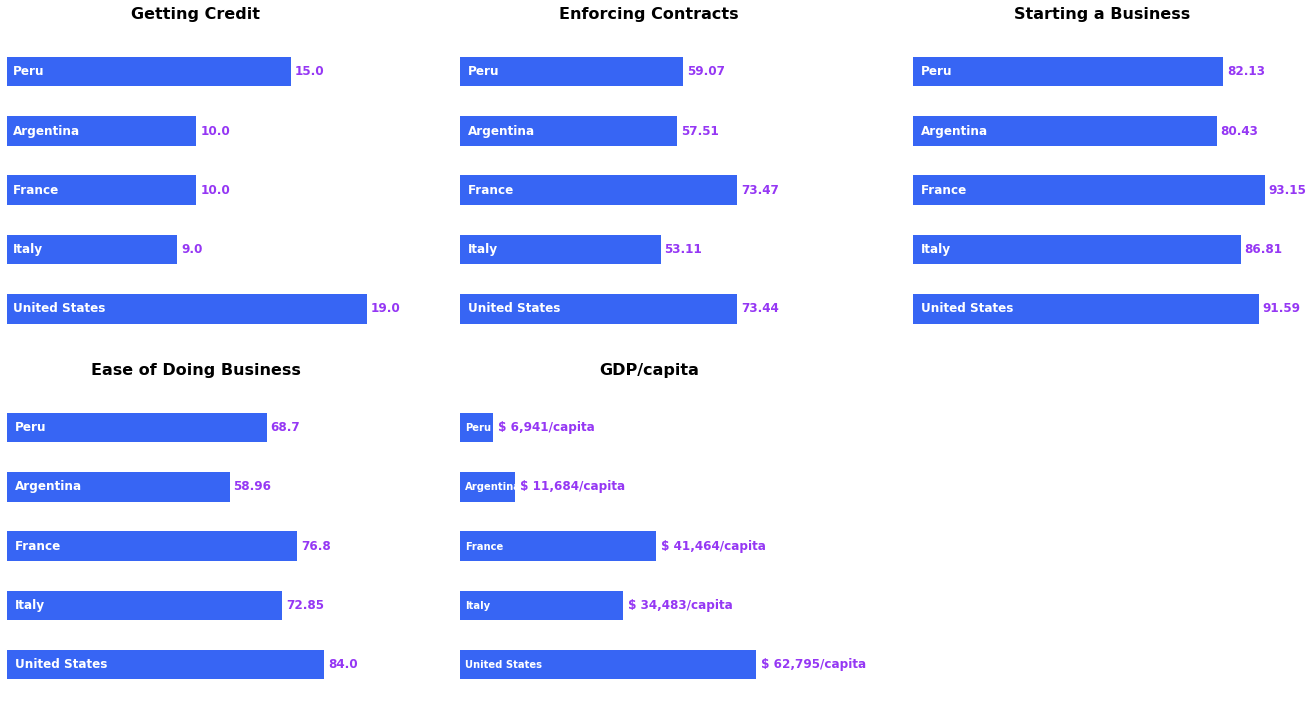

In [49]:
# Create a panel of graph featuring "Doing Business" score and "GDP/capita" on a graph
fig_country = plt.figure() # create figure

country_graph_list = ['Ease of Doing Business', 'GDP/capita']
ax_list1 = ['ax1', 'ax2', 'ax3', 'ax4', 'ax5']
color_list = ['#3765F4', '#9537F4', '#E637F4', '#F43737', '#F46237', '#F49837', 'black', 'white', '#37F49B', '#37E3F4']

for i, ax in enumerate(ax_list1):
    ax_list1[i] = fig_country.add_subplot(2, 3, i+1)
    graph_country[graph_columns[i]].plot(kind='barh', color = color_list[0], figsize = (23, 12), ax = ax_list1[i])
    ax_list1[i].set_title(graph_columns[i] + '\n' , fontsize = 16, fontweight = 'bold')
    
    # Setup graph area        
    ax_list1[i].axes.get_yaxis().set_ticks([])
    ax_list1[i].axes.get_xaxis().set_visible(False)
    ax_list1[i].spines['top'].set_visible(False)
    ax_list1[i].spines['right'].set_visible(False)
    ax_list1[i].spines['left'].set_visible(False)
    ax_list1[i].spines['bottom'].set_visible(False)
    
    for j, country in enumerate(countries_example):
        
        if i == 0:
            # Add country name to bar
            ax_list1[i].text(0.3 , j - 0.05,
                             countries_example[j],
                             fontsize = 12,
                             color = color_list[7],
                             fontweight = 'bold')

            # Add dimension value to bar
            ax_list1[i].text(graph_country[graph_columns[i]][j] + 0.2, j - 0.05,
                             str(graph_country[graph_columns[i]][j]),
                             fontsize = 12,
                             color = color_list[1],
                             fontweight = 'bold')
            
        elif i == 4:
            # Add country name to bar
            ax_list1[i].text(1000 , j - 0.05,
                             countries_example[j],
                             color = color_list[7],
                             fontweight = 'bold')

            # Add dimension value to bar
            ax_list1[i].text(graph_country[graph_columns[i]][j]+ 1000, j - 0.05,
                             '$ '+ f'{graph_country[graph_columns[i]][j]:,}'
                             + '/capita', fontsize = 12,
                             color = color_list[1], fontweight = 'bold')
            ax_list1[i].set_xlim([0, 80000])
            
        else:
            # Add country name to bar
            ax_list1[i].text(2 , j - 0.05,
                             countries_example[j],
                             fontsize = 12,
                             color = color_list[7],
                             fontweight = 'bold')

            # Add dimension value to bar
            ax_list1[i].text(graph_country[graph_columns[i]][j] + 1, j - 0.05,
                             str(graph_country[graph_columns[i]][j]),
                             fontsize = 12,
                             color = color_list[1],
                             fontweight = 'bold')
            ax_list1[i].set_xlim([0, 100])
            
        

plt.show()   

# ------------------------------------------------------------------------------
<br /><br /><br />

### 2.D. Getting Capital Cities' Coordinates:

In [50]:
# Create a dataframe for analysis
df_for_analysis = df_capital.copy()

We will first define a function that will retrieve the coordinates of a chosen city.

In [83]:
# This function will return the coordinates of the point of intrest
def get_loc_coords(city, country):
    point_of_intrest = city + ', ' + country
    geolocator = Nominatim(user_agent = 'coordinate_finder')
    location = geolocator.geocode(point_of_intrest)
    lat = location.latitude
    lon = location.longitude
    return [lat, lon]

In [86]:
# Get the coordinates of each capital city and add to our dataframe
coordinates_list = []
for i in range (len(df_for_analysis)):
    coordinates_list.append(get_loc_coords(df_for_analysis['Capital City'][i],df_for_analysis['Country'][i]))
    time.sleep(2)
    
df_coordinates = pd.DataFrame(coordinates_list)
df_for_analysis['Capital City Latitude'] = df_coordinates[0]
df_for_analysis['Capital City Longitude'] = df_coordinates[1]

df_for_analysis.head()

,Country,Capital City,Region,Getting Credit,Enforcing Contracts,Starting a Business,Ease of Doing Business,GDP/capita,Capital City Latitude,Capital City Longitude
0,Netherlands,Amsterdam,Europe & Central Asia,9.0,59.94,94.34,76.10,53024,52.374540,4.897976
1,Turkey,Ankara,Europe & Central Asia,15.0,71.40,88.79,76.79,9370,39.920777,32.854067
2,Paraguay,Asunción,Latin America & Caribbean,8.0,61.62,75.98,59.05,5822,-25.280046,-57.634381
3,Greece,Athens,Europe & Central Asia,9.0,48.12,96.00,68.42,20324,37.984149,23.727984
4,Azerbaijan,Baku,Europe & Central Asia,20.0,70.29,96.16,76.71,4721,40.375443,49.832675


#### Our dataframe still has some countries that are not from the 3 regions we want to focus on, so we will remove any thing east of Europe:

In [87]:
# Remove countries with a location eastern to Europe
df_for_analysis = df_for_analysis[df_for_analysis['Capital City Longitude'] < 33.38]
df_for_analysis = df_for_analysis[df_for_analysis['Capital City Longitude'] > -99.2]
df_for_analysis.reset_index(drop = True, inplace = True)
df_for_analysis.shape

(68, 10)

During the analysis of the location data it was noticed that the coordinates retrieved for "Brasília" (Brazil) were not correct.
<br />
So we will change the coordinates to the true ones that can be found on Google.

In [88]:
# Fix Brasília coordinates
correct_coords = [-15.8267, -47.9218]
df_for_analysis['Capital City Latitude'][9] = correct_coords[0]
df_for_analysis['Capital City Longitude'][9] = correct_coords[1]
df_for_analysis.iloc[9]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Country                                      Brazil
Capital City                               Brasília
Region                    Latin America & Caribbean
Getting Credit                                   10
Enforcing Contracts                           64.08
Starting a Business                           81.29
Ease of Doing Business                        59.08
GDP/capita                                     8921
Capital City Latitude                      -15.8267
Capital City Longitude                     -47.9218
Name: 9, dtype: object

<br />
Let's visualize the countries we have in our database on a map.

In [125]:
# create map of capital cities in the dataframe
world_map = folium.Map(location=[0, 0], zoom_start = 2, tiles='stamentoner')

# add markers to map
for lat, lng, city, country in zip(df_for_analysis['Capital City Latitude'],
                                   df_for_analysis['Capital City Longitude'],
                                   df_for_analysis['Capital City'],
                                   df_for_analysis['Country']):
    
    label = '{}, {}'.format(city, country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 2,
        popup = label,
        color = color_list[0],
        fill = True,
        fill_color = color_list[0],
        fill_opacity = 1,
        parse_html = False).add_to(world_map)  
    
world_map

# ------------------------------------------------------------------------------
<br /><br /><br />

### 2.E. Creating a Country Profile Card:

#### Before we step into our analysis stage, let's take a look what we have gathered so far and what we can learn about each country:

Here we can set a profile for a country of our choice by changing the "profile_country" to the country's name.
<br />
We will take The United States for example.

In [90]:
# Create a dataframe for each cultural dimension featuring the United States
profile_country = 'United States'
profile_data = df_for_analysis.loc[df_for_analysis['Country'] == profile_country].reset_index(drop = True).transpose()
profile_data.rename(columns = {0 : 'Values'}, inplace = True)
profile_data

,Values
Country,United States
Capital City,"Washington, D.C."
Region,North America
Getting Credit,19
Enforcing Contracts,73.44
Starting a Business,91.59
Ease of Doing Business,84
GDP/capita,62795
Capital City Latitude,38.8949
Capital City Longitude,-77.0366


In [91]:
# Setting up some data for the profile panel
profile_indicators = profile_data[3:7]
profile_coordinates = profile_data[8:]
profile_indicators

,Values
Getting Credit,19
Enforcing Contracts,73.44
Starting a Business,91.59
Ease of Doing Business,84


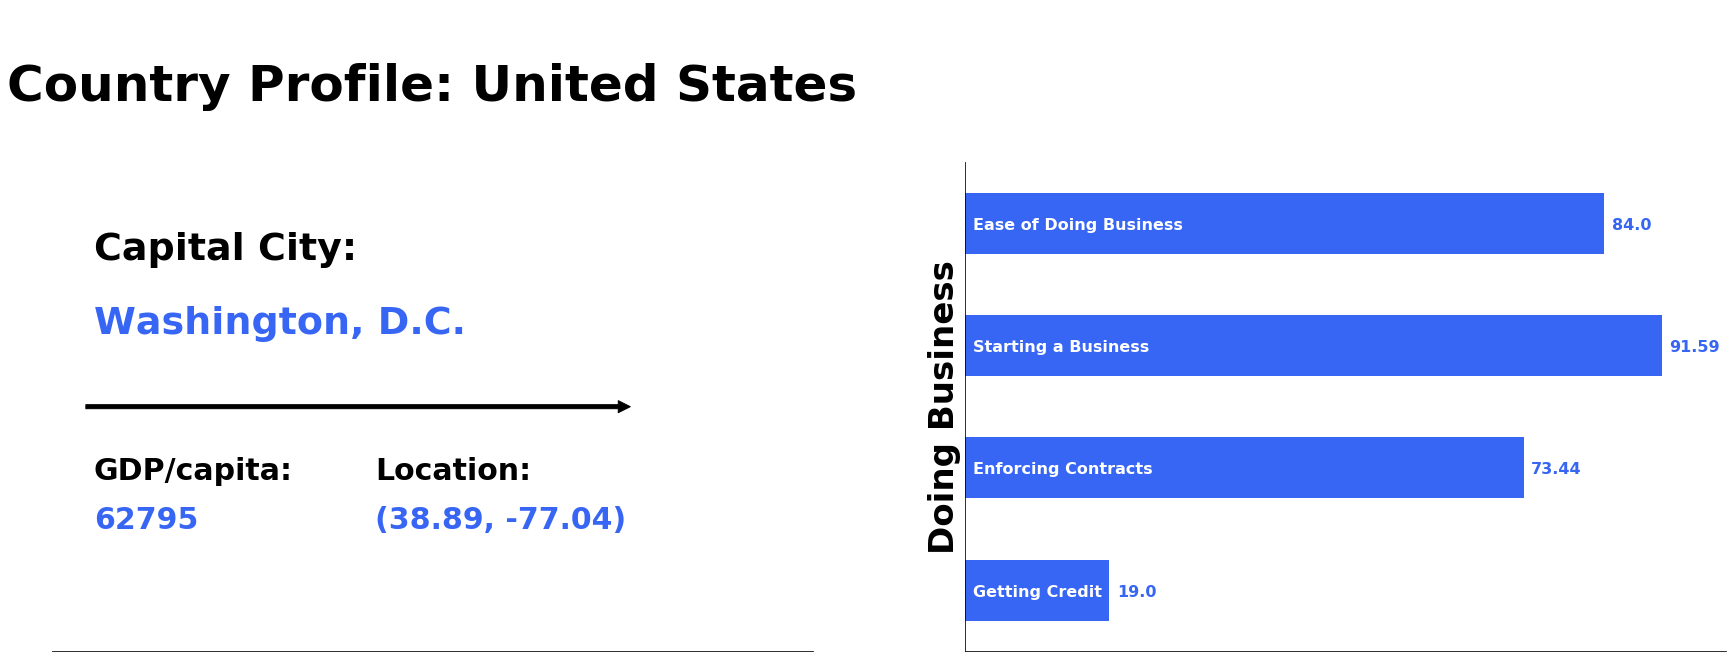

In [92]:
# Create the country profile
fig_profile = plt.figure()

ax_profile_info = fig_profile.add_subplot(1, 2, 1)
ax_profile_country = fig_profile.add_subplot(1, 2, 2)

# Set profile frame
ax_profile_info.spines['top'].set_visible(False)
ax_profile_info.spines['right'].set_visible(False)
ax_profile_info.spines['left'].set_visible(False)
ax_profile_info.axes.get_yaxis().set_visible(False)
ax_profile_info.axes.get_xaxis().set_visible(False)

# Profile title:
ax_profile_info.set_title('\nCountry Profile: ' + profile_country + '\n', fontsize = 50, fontweight = 'bold')

# Profile capital ciy
ax_profile_info.text(0.055 , 0.8,
                     'Capital City:',
                     fontsize = 38, color = color_list[6],
                     fontweight = 'bold')

ax_profile_info.text(0.055 , 0.65,
                     profile_data['Values'][1],
                     fontsize = 38,
                     color = color_list[0],
                     fontweight = 'bold')

# Profile location info
ax_profile_info.text(0.425 , 0.35,
                     'Location:',
                     fontsize = 30,
                     color = color_list[6],
                     fontweight = 'bold')

ax_profile_info.text(0.425 , 0.25,
                     '('
                     + str(round(profile_coordinates['Values'][0], 2))
                     + ', '
                     + str(round(profile_coordinates['Values'][1], 2))
                     + ')',
                     fontsize = 30,
                     color = color_list[0],
                     fontweight = 'bold')

# Profile GDP info
ax_profile_info.text(0.055 , 0.35,
                     'GDP/capita:',
                     fontsize = 30,
                     color = color_list[6],
                     fontweight = 'bold')

ax_profile_info.text(0.055 , 0.25,
                     str(profile_data['Values'][7]),
                     fontsize = 30,
                     color = color_list[0],
                     fontweight = 'bold')


# Add arrow
ax_profile_info.annotate('', xy = (0.8, 0.5),
                         xytext = (0.005, 0.5),
                         arrowprops = dict(facecolor = color_list[6], shrink = 0.05))

# Profile Doing Business indicators
profile_indicators.plot(kind='barh', color = color_list[0], figsize = (30, 9), ax = ax_profile_country)

# Setup the graph design
ax_profile_country.set_xlim([0, 100])
ax_profile_country.get_legend().remove()
ax_profile_country.axes.get_yaxis().set_ticks([])
ax_profile_country.axes.get_xaxis().set_visible(False)
ax_profile_country.spines['top'].set_visible(False)
ax_profile_country.spines['right'].set_visible(False)
ax_profile_country.spines['right'].set_visible(False)

# Set y label
ax_profile_country.set_ylabel('Doing Business', fontsize = 34, fontweight = 'bold')

# Add indicator name to corresponding bar 
for i, indicator in enumerate(profile_data.index[3:7]):
    
    # Add indicator name to bar
    ax_profile_country.text(1 , i - 0.05, indicator, fontsize = 16, color = color_list[7], fontweight = 'bold')
    
    # Add indicator value to bar
    ax_profile_country.text(profile_data['Values'][3 + i] + 1, i - 0.05, str(profile_data['Values'][3 + i]), fontsize = 16, color = color_list[0], fontweight = 'bold')



In [93]:
# Zoom in on country in profile
lat_profile = profile_coordinates['Values'][0]
lng_profile = profile_coordinates['Values'][1]
city_profile = profile_data['Values'][1]

profile_map = folium.Map(location=[lat_profile, lng_profile], zoom_start = 10, tiles ='stamentoner')

# add markers to map
label = '{}, {}'.format(city_profile, profile_country)
label = folium.Popup(label, parse_html = True)
folium.CircleMarker([lat_profile, lng_profile],
                    radius = 300,
                    popup = label,
                    color = color_list[0],
                    fill = True,
                    fill_color = color_list[1],
                    fill_opacity = 0.2,
                    parse_html = False).add_to(profile_map)  
    
profile_map

### This is our Country profile, we can set the variable "profile_country" to what ever country we want to explore.

### We have used the United States as an example of a country's profile.

# ------------------------------------------------------------------------------
<br /><br /><br />

### 2.F. Collecting Foursquare Capital Cities' Data: 

In [94]:
# The code was removed by Watson Studio for sharing.

In [95]:
# Radius of search set to 3 kilometers
radius = 3000

# Limit calls per location
LIMIT = 200
print('Foursqure URL variables stored.')

Foursqure URL variables stored.


Let's define a function that will retrieve the venue data we need for our analysis.

In [96]:
# This function will get the top venues for a city
def get_capital_venues(city_name, city_lat, city_lng, radius, LIMIT):
    
    # Empty list for retrived venues of capital city
    venues_list = [] 
    
    # Define the dataframe's columns
    venues_columns = ['Capital City', 
                      'Capital City Latitude', 
                      'Capital City Longitude',
                      'Venue', 
                      'Venue Latitude', 
                      'Venue Longitude', 
                      'Venue Category']

    # Find each capital city's top venues
    for c_city, c_lat, c_lng in zip(city_name, city_lat, city_lng):
            # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                c_lat, 
                c_lng, 
                radius, 
                LIMIT)

        # GET request to retrive the top venues
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # Add the results into the empty venue list
        for venue in results:
            venues_list.append([c_city, c_lat, c_lng,
                                venue['venue']['name'],
                                venue['venue']['location']['lat'],
                                venue['venue']['location']['lng'],
                                venue['venue']['categories'][0]['name']])
    
    # Create a dataframe for the list of venues
    df_venues = pd.DataFrame(venues_list, columns = venues_columns)

    return(df_venues)

In [97]:
# Collect the venues for our dataframe
city_name = df_for_analysis['Capital City']
city_lat = df_for_analysis['Capital City Latitude']
city_lng = df_for_analysis['Capital City Longitude']

capital_venues = get_capital_venues(city_name, city_lat, city_lng, radius, LIMIT)

In [98]:
capital_venues.head()

,Capital City,Capital City Latitude,Capital City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amsterdam,52.37454,4.897976,De Koffieschenkerij,52.374043,4.898427,Coffee Shop
1,Amsterdam,52.37454,4.897976,Omelegg - City Centre,52.376060,4.899802,Breakfast Spot
2,Amsterdam,52.37454,4.897976,Old Amsterdam Cheese Store,52.374862,4.895301,Cheese Shop
3,Amsterdam,52.37454,4.897976,Bierproeflokaal In de Wildeman,52.376222,4.895134,Bar
4,Amsterdam,52.37454,4.897976,Tony’s Chocolonely Super Store,52.375589,4.896802,Chocolate Shop


In [99]:
print('We have retrived {} venues across our {} capital cities.'.format(capital_venues.shape[0],len(capital_venues['Capital City'].unique())))

We have retrived 6142 venues across our 68 capital cities.


# ------------------------------------------------------------------------------
<br /><br /><br />

## 4. References

Foursquare. (n.d.). Foursquare Developer. Retrieved December 28, 2019, from Foursquare:
https://developer.foursquare.com/

Wikipedia contributors. (2019, December). List of national capitals. Retrieved December 28, 2019, from Wikipedia: https://en.wikipedia.org/wiki/List_of_national_capitals

World Bank, Doing Business. (n.d.-a). Doing Business Indicators [Data file]. Retrieved from The World Bank: https://databank.worldbank.org/source/doing-business

World Bank, World Development Indicators. (n.d.-b). GDP per capita (current US$) [Data File]. Retrieved December 28, 2019, from The World Bank: https://databank.worldbank.org/source/world-development-indicators